In [1]:
import optforge as of
from optforge.benchmarks.vobench_benchmarks import VOBenchmark
import vobench as vb
import numpy as np

from PyXAB.algos.DOO import DOO

inputs = vb.imread(r"F:\Stuff\Programming\AI\VOBench\VOBench\notebooks\affine\A2.jpeg")[:,:,0]
targets = vb.imread(r"F:\Stuff\Programming\AI\VOBench\VOBench\notebooks\affine\A.jpeg")[:,:,0]

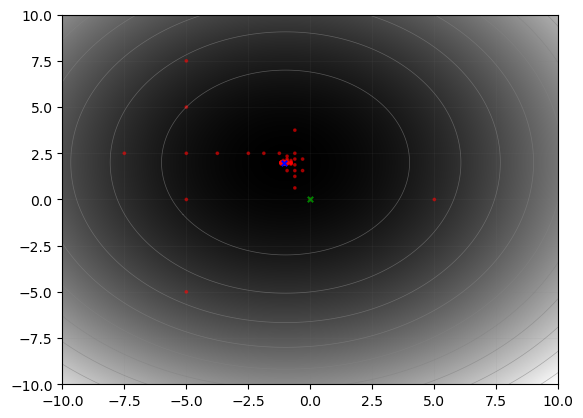

1000


In [6]:
vob = vb.FunctionDescent2D.from_test_function(vb.test_functions.SphereShifted())
#vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

algo = DOO(1000, domain=[[-10,10],[-10,10]],)

for t in range(1, 1001):
    point = algo.pull(t)
    reward = vob.step_noline(point)
    algo.receive_reward(t, -reward)

vob.plot()
print(vob.current_step)

evals: 1000/1000 | best value: 0.0000                            
Job finished in 2.6s., did 1000 evaluations.


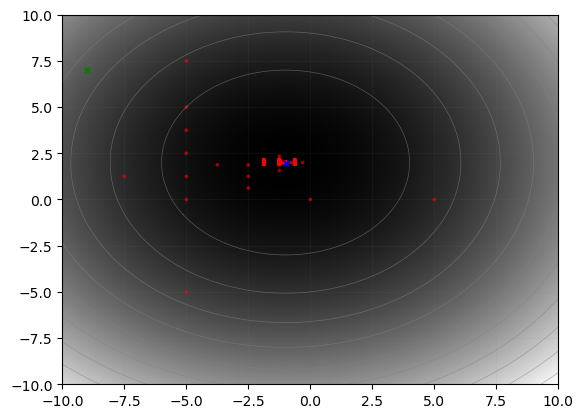

In [2]:
vob = vb.FunctionDescent2D.from_test_function(vb.test_functions.SphereShifted())

optimizer = of.integrations.PyXABOptimizer(DOO)

study = of.minimize(
    vob.step_noline,
    vob.params,
    optimizer,
    max_evals = 1000,
    bounds = (-10, 10),
)

vob.plot()